In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df_police = pd.read_csv('./police_violence_cleaned_again.csv')
df_population = pd.read_csv('./state_population.csv')
df_police.head()

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Jose Oyuela-Palma,49,Male,Unknown race,9/21/2021,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
1,Trent Leach,30,Male,Unknown race,9/21/2021,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2,Phillip Lopez,42,Male,Unknown race,9/20/2021,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
3,Deon Ledet,30,Male,Black,9/20/2021,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
4,Jason Husted,47,Male,Unknown race,9/18/2021,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed


In [3]:
df_population

,state,abbreviation,population,lat,long
0,Alabama,AL,4903185,32.377716,-86.300568
1,Alaska,AK,731545,58.301598,-134.420212
2,Arizona,AZ,7278717,33.448143,-112.096962
3,Arkansas,AR,3017804,34.746613,-92.288986
4,California,CA,39512223,38.576668,-121.493629
5,Colorado,CO,5758736,39.739227,-104.984856
6,Connecticut,CT,3565287,41.764046,-72.682198
7,Delaware,DE,973764,39.157307,-75.519722
8,District of Columbia,DC,705749,38.895110,-77.036370
9,Florida,FL,21477737,30.438118,-84.281296


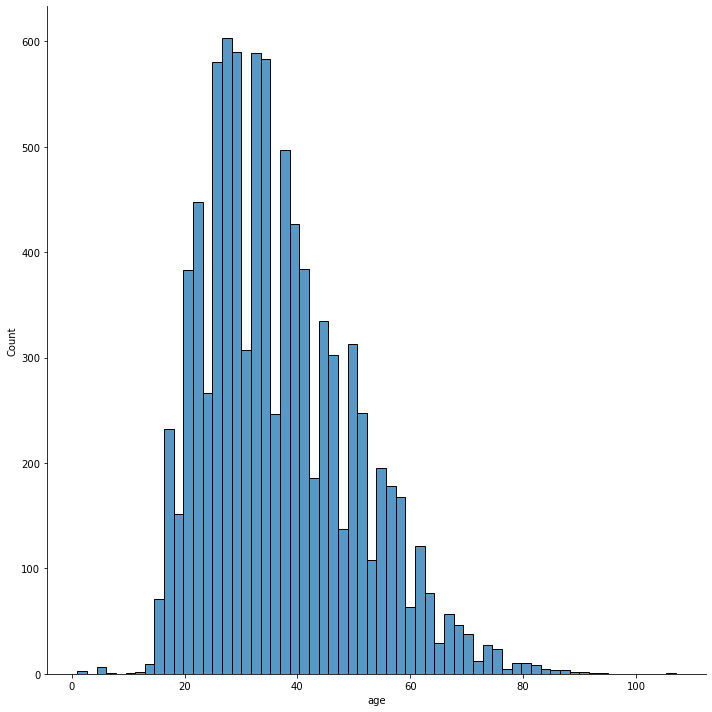

In [4]:
sns.displot(data=df_police, x='age',height=10)
plt.show()

In [ ]:
sns.catplot(data=df_police.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
plt.show()

In [ ]:
for state in df_population['abbreviation']:
    
    print(df_population.loc[df_population['abbreviation'] == state, ['population']])  


In [ ]:
Figure out how to get the population based on the state




In [ ]:
sns.catplot(data=df_police, x='race', kind="count", palette="ch:.25", height=5, aspect=2)
plt.show()


In [ ]:
date_list = df_police['date_of_incident'].to_list()
date_map = dict()
for date in date_list:
    year = date.split('/')[2]
    if year in date_map:
        date_map[year] += 1
    else:
        date_map[year] = 1

date_map

# d = {'col1': [1, 2], 'col2': [3, 4]}

In [ ]:
df_date = pd.DataFrame(data=date_map, columns=['year', 'count'])

df_date['year'] = date_map.keys()
df_date['count'] = date_map.values()
df_date

In [ ]:
sns.catplot(x="year", y="count",kind="bar", data=df_date)